---
* **Titulo**: UOC-Apotheikon
* **Autores:** Maite Piedra, Jordi Bosch y Miguel Alejandro Ponce.
* **Correo:** miguelalejoponce@uoc.edu
* **Fecha:** "Febrero, 21 de 2022"
* **Salida**: ipynb, json
* **Licencia**: MIT License
---
## Contexto: Preprocesamiento Datos

* **Contexto**: La entrega de esta PEC está compuesta por:

En esta segunda parte de la práctica, el estudiante tendrá que desarrollar una visualización de datos que demuestren su conocimiento del campo, así como el uso de diferentes herramientas y técnicas, basadas en el conjunto seleccionado y validado en la primera parte.

Aparte de la visualización, el estudiante tendrá que entregar un video que describa los siguientes puntos:

1) [25%] El proceso de creación siguió y decisiones de diseño que se han tomado a lo largo del desarrollo.
2) [30%] La presentación in situ de la visualización, es decir, comentar sobre las características de la visualización mientras navega.
3) [15%] El conjunto de datos que se muestran.
4) [20%] Las preguntas que contengan la vista.
5) [15%] Los elementos interactivos disponibles como parte de la pantalla.

El video debe durar entre 3 y 5 minutos. Es importante respetar este rango de tiempo, ya que también se evalúa la capacidad de síntesis y la calidad del script.

El código debe publicarse en un repositorio público, como Gitlab o GitHub, con una licencia de código abierto. Debe incluir todos los archivos necesarios para ejecutar, eventualmente, la aplicación en un servidor web local. La URL de la pantalla debe ser pública y debe ser explorada sin iniciar sesión. Por ejemplo, GitHub Pages (https://pages.github.com/), Surge.sh o cargue la aplicación a un espacio web accesible. En el caso de Tableau, puede publicar en Tableau Public, así como otras herramientas en línea.



# Librerías

In [ ]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
import os
import pandas as pd
import re
import numpy as np
import csv

In [ ]:
ruta_xlsx = "./productos_farmacia/"
def crear_diretorio(filename):
  if not os.path.exists(os.path.dirname(filename)):    
        os.makedirs(os.path.dirname(filename))
crear_diretorio(ruta_xlsx)

# Descarga Fuentes de Datos

In [ ]:
!wget https://github.com/miguelalejo/UOC-Apotheikon/raw/main/raw-data/items_ordered_2years.rar -O ./productos_farmacia/items_ordered_2years.rar

--2022-03-09 21:36:20--  https://github.com/miguelalejo/UOC-Apotheikon/raw/main/raw-data/items_ordered_2years.rar
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/miguelalejo/UOC-Apotheikon/main/raw-data/items_ordered_2years.rar [following]
--2022-03-09 21:36:20--  https://raw.githubusercontent.com/miguelalejo/UOC-Apotheikon/main/raw-data/items_ordered_2years.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39953504 (38M) [application/octet-stream]
Saving to: ‘./productos_farmacia/items_ordered_2years.rar’

./productos_farmaci 100%[===================>]  38.10M   162MB/s    in 0.2s    

2022-0

In [ ]:
!wget https://github.com/miguelalejo/UOC-Apotheikon/raw/main/raw-data/products.csv -O ./productos_farmacia/products.csv

--2022-03-09 21:36:24--  https://github.com/miguelalejo/UOC-Apotheikon/raw/main/raw-data/products.csv
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/miguelalejo/UOC-Apotheikon/main/raw-data/products.csv [following]
--2022-03-09 21:36:24--  https://raw.githubusercontent.com/miguelalejo/UOC-Apotheikon/main/raw-data/products.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8530333 (8.1M) [text/plain]
Saving to: ‘./productos_farmacia/products.csv’

./productos_farmaci 100%[===================>]   8.13M  --.-KB/s    in 0.1s    

2022-03-09 21:36:25 (77.7 MB/s) - ‘./productos_farmacia/products.csv

In [ ]:
!wget https://raw.githubusercontent.com/miguelalejo/UOC-Apotheikon/main/raw-data/products_categories.csv -O ./productos_farmacia/products_categories.csv

--2022-03-09 21:36:25--  https://raw.githubusercontent.com/miguelalejo/UOC-Apotheikon/main/raw-data/products_categories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 565184 (552K) [text/plain]
Saving to: ‘./productos_farmacia/products_categories.csv’

./productos_farmaci 100%[===================>] 551.94K  --.-KB/s    in 0.05s   

2022-03-09 21:36:26 (10.6 MB/s) - ‘./productos_farmacia/products_categories.csv’ saved [565184/565184]



In [ ]:
!unrar x -Y "./productos_farmacia/items_ordered_2years.rar" "./productos_farmacia/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ./productos_farmacia/items_ordered_2years.rar

Extracting  ./productos_farmacia/items_ordered_2years.txt                  0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98%

# Integración fuentes de datos

In [ ]:
def conv(val):
  try:
    return val
  except ValueError:
    print(val)
    return val.replace("\"", "")

In [ ]:
df_items_ordered = pd.read_csv('./productos_farmacia/items_ordered_2years.txt', delimiter = '|',
                               converters={'zipcode':conv},encoding='utf-8', engine ='python',quoting=csv.QUOTE_NONE)

In [ ]:
columnas = [s.replace('"' , '') for s in df_items_ordered.columns.values ]
df_items_ordered.columns = columnas

In [ ]:
df_items_ordered = df_items_ordered.replace({'"':''}, regex=True)

In [ ]:
df_items_ordered.describe()

,product_id,qty_ordered,base_cost,price,discount_percent
count,930910.000000,930910.000000,928508.000000,930910.000000,930910.000000
mean,28608.871123,1.354651,8.497943,10.883488,8.188978
std,26808.334644,1.280744,77.508452,9.888204,6.760161
min,85.000000,1.000000,-164.797400,0.000000,1.000000
25%,6480.000000,1.000000,3.304675,4.690000,5.000000
50%,14765.000000,1.000000,6.095400,8.220000,6.000000
75%,50567.000000,1.000000,10.465000,13.960000,10.000000
max,98205.000000,120.000000,47251.000000,650.830000,100.000000


In [ ]:
df_items_ordered

,num_order,item_id,created_at,product_id,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode
0,562ba4ba9aaf2a1e926842deca19271d,2bca87c2ab10b07feef290a9be47f316,2017-01-01 00:20:33,6409.0,1.0,13.4204,17.17,8.0,50d7f99947b472cc889d58845b9d23e2,Valencia,46019
1,562ba4ba9aaf2a1e926842deca19271d,53e12ac4b579f0c4b1c4f77d50bf8792,2017-01-01 00:20:33,5133.0,1.0,18.5351,22.68,8.0,50d7f99947b472cc889d58845b9d23e2,Valencia,46019
2,562ba4ba9aaf2a1e926842deca19271d,d19d6df5cd6a1e741408b70aa2767bf4,2017-01-01 00:20:33,5125.0,1.0,18.5260,22.68,8.0,50d7f99947b472cc889d58845b9d23e2,Valencia,46019
3,8ebeb895d692d538b14dbcd6e91cbb96,a960b68b6ba45056840bc17ab5719d57,2017-01-01 01:01:26,51380.0,1.0,9.0800,9.83,8.0,4262aed63db19ac1068c442d65a02c26,Almeria,04009
4,8ebeb895d692d538b14dbcd6e91cbb96,408f9e8e14e10a17e9b30c3e1feaa865,2017-01-01 01:01:26,7695.0,1.0,5.6440,9.05,8.0,4262aed63db19ac1068c442d65a02c26,Almeria,04009
...,...,...,...,...,...,...,...,...,...,...,...
930908,47354301ee34d415c360d2bf5d4f2e82,3f9aef7cab96e706431c222b8465d36a,2018-12-30 23:56:22,91881.0,1.0,11.3100,13.71,10.0,430936fb72fe24a59e767164848fab03,Bilbao,48007
930909,47354301ee34d415c360d2bf5d4f2e82,f1de0e68b4c8f9a42927230309b6a2e4,2018-12-30 23:56:22,1755.0,1.0,1.9800,2.47,10.0,430936fb72fe24a59e767164848fab03,Bilbao,48007
930910,bf923aa16e0608a5ed95347a9f411dce,8d8600ea4e451330f8614ba08ad4f047,2018-12-30 23:57:37,92793.0,1.0,33.7360,32.93,10.0,d73f27d3ab96df71f0fdc47511f326bc,Vic,08500
930911,bf923aa16e0608a5ed95347a9f411dce,b74b2e1a096c656a247142e24eefb738,2018-12-30 23:57:37,93036.0,1.0,0.0000,16.32,10.0,d73f27d3ab96df71f0fdc47511f326bc,Vic,08500


In [ ]:
df_products = pd.read_csv('./productos_farmacia/products.csv', 
                               encoding='utf-8', engine ='python')

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27953 entries, 0 to 27952
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         27953 non-null  int64 
 1   sku                27953 non-null  object
 2   name               27939 non-null  object
 3   marca_value        27921 non-null  object
 4   short_description  27930 non-null  object
 5   analytic_category  24416 non-null  object
 6   picture            27947 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [ ]:
df_products.describe()

,product_id
count,27953.000000
mean,42910.830287
std,30029.951620
min,85.000000
25%,11541.000000
50%,42565.000000
75%,69520.000000
max,98205.000000


In [ ]:
df_products

,product_id,sku,name,marca_value,short_description,analytic_category,picture
0,7349,165774,Pañales CHELINO LOVE Talla3 4-10 KG 36unidades,Chelino,"<p>Los pañales <strong>Chelino</strong>, que p...",Infantil,https://www.mifarma.es/media/catalog/product/1...
1,7347,165776,Pañales CHELINO LOVE Talla5 13-18 KG 30unidades,Chelino,<p>Los pañales Chelino que presentan un novedo...,Infantil,https://www.mifarma.es/media/catalog/product/1...
2,50282,230154,Pañales Pingo Maxi T4 40 uds,Pingo,<p>Pingo es el primer pañal ecológico con cuat...,Infantil,https://www.mifarma.es/media/catalog/product/2...
3,7348,165775,Pañales CHELINO LOVE Talla4 9-15 KG 34unidades,Chelino,"<p>Los pañales Chelino, que presentan un noved...",Infantil,https://www.mifarma.es/media/catalog/product/1...
4,24517,011905,Dodot Pañal T4 9-15Kg 30unds,Dodot,<p>¿Qué le pides a un pañal? ¿Absorción máxima...,NaN,https://www.mifarma.es/media/catalog/product/0...
...,...,...,...,...,...,...,...
27948,22432,433363.AZUL,Sujetachupetes TOMMEE TIPPEE (2 tons de azul),Tommee tippee,<p>Prácticos sujetachupetes infantiles ideales...,Infantil,https://www.mifarma.es/media/catalog/product/4...
27949,30090,10.22.12.256,Crème de profunda esfoliante Apivita Rose pimenta,Apivita,<p>Apivita Rose Pepper Crema Exfoliante Profun...,Higiene,https://www.mifarma.es/media/catalog/product/1...
27950,97587,PURO0113,Corrector Líquido Sublime Ecológico PuroBio To...,PuroBio,<p>Corrector líquido apto para veganos. Muy cu...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/p...
27951,3693,211391,Dermatix Gel Silicone Cicatrizes 15 gramas,Dermatix,<p>Gel que elimina o reduce las cicatrices. Es...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/2...


In [ ]:
df_categories = pd.read_csv('./productos_farmacia/products_categories.csv', 
                               encoding='latin-1' , warn_bad_lines=True, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8449: expected 4 fields, saw 5\n'


In [ ]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11158 entries, 0 to 11157
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sku     11158 non-null  object
 1   cat1    10740 non-null  object
 2   cat2    10720 non-null  object
 3   cat3    10440 non-null  object
dtypes: object(4)
memory usage: 348.8+ KB


In [ ]:
df_categories.describe()

,sku,cat1,cat2,cat3
count,11158,10740,10720,10440
unique,11158,8,52,262
top,00.01.10.014,Cosmética y Belleza,Facial,Antiarrugas
freq,1,3353,1789,391


In [ ]:
df_categories

,sku,cat1,cat2,cat3
0,00.01.10.014,Cosmética y Belleza,Corporal,Hidratación
1,00.071697.000.000,Infantil,Juguetes,Mordedores
2,000133,Infantil,Higiene infantil,Canastillas y kits bebé
3,000147,Higiene y cuidado personal,Facial,Desmaquillantes y limpiadores
4,000148,Cosmética y Belleza,Manos,Crema de Manos
...,...,...,...,...
11153,ZTV15215,Higiene y cuidado personal,Íntima,Limpieza
11154,ZTV15216,Higiene y cuidado personal,Cabello,Champu
11155,zuecoloki,Salud,Ortopedia,Zapatos y Zuecos
11156,zuecooden,Salud,Ortopedia,Zapatos y Zuecos


### Combinación conjunto de datos

In [ ]:
df_merge_cat_prod = df_categories.merge(df_products, left_on='sku', right_on='sku')
data = df_merge_cat_prod.merge(df_items_ordered, left_on='product_id', right_on='product_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016938 entries, 0 to 1016937
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1016938 non-null  object 
 1   cat1               1016938 non-null  object 
 2   cat2               1016822 non-null  object 
 3   cat3               1002007 non-null  object 
 4   product_id         1016938 non-null  int64  
 5   name               1012684 non-null  object 
 6   marca_value        1016938 non-null  object 
 7   short_description  1016861 non-null  object 
 8   analytic_category  964172 non-null   object 
 9   picture            1016938 non-null  object 
 10  num_order          1016938 non-null  object 
 11  item_id            1016938 non-null  object 
 12  created_at         1016938 non-null  object 
 13  qty_ordered        1016938 non-null  float64
 14  base_cost          1016198 non-null  float64
 15  price              1016938 non-n

In [ ]:
data

,sku,cat1,cat2,cat3,product_id,name,marca_value,short_description,analytic_category,picture,num_order,item_id,created_at,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode
0,00.01.10.014,Cosmética y Belleza,Corporal,Hidratación,17229,Body Milk con Bergamota y Te Apivita 50ml,Apivita,<p>Leche corporal a base de té y bergamota que...,Higiene,https://www.mifarma.es/media/catalog/product/0...,53bdf7758a2910a88d2db5c90bac9d86,c589b31862ef50e548e2d18bc0daac3b,2017-03-02 21:36:38,1.0,0.56,2.85,5.0,65b03949d3939d49c8caf082faed86b4,Bilbao,48015
1,00.01.10.014,Cosmética y Belleza,Corporal,Hidratación,17229,Body Milk con Bergamota y Te Apivita 50ml,Apivita,<p>Leche corporal a base de té y bergamota que...,Higiene,https://www.mifarma.es/media/catalog/product/0...,1c4ded7fcbd2b45a16fbc1db00f4473a,be35b96e1da850a22f62435710457461,2017-03-19 17:56:57,2.0,0.56,2.85,5.0,33a92c19e79fc2799ea0460f28faefc0,Madrid,28522
2,00.01.10.014,Cosmética y Belleza,Corporal,Hidratación,17229,Body Milk con Bergamota y Te Apivita 50ml,Apivita,<p>Leche corporal a base de té y bergamota que...,Higiene,https://www.mifarma.es/media/catalog/product/0...,1c4ded7fcbd2b45a16fbc1db00f4473a,be35b96e1da850a22f62435710457461,2017-03-19 17:56:57,2.0,0.56,2.85,5.0,33a92c19e79fc2799ea0460f28faefc0,Madrid,28522
3,00.01.10.014,Cosmética y Belleza,Corporal,Hidratación,17229,Body Milk con Bergamota y Te Apivita 50ml,Apivita,<p>Leche corporal a base de té y bergamota que...,Higiene,https://www.mifarma.es/media/catalog/product/0...,999afab8ec5bb8d28c7d1f1d79087f43,79d36106df51111d9e05b8264ae80da0,2017-08-23 19:48:41,1.0,0.56,2.86,20.0,414da4fae0b5f6aca9eadc4d085d92e4,Almansa,02640
4,00.01.10.014,Cosmética y Belleza,Corporal,Hidratación,17229,Body Milk con Bergamota y Te Apivita 50ml,Apivita,<p>Leche corporal a base de té y bergamota que...,Higiene,https://www.mifarma.es/media/catalog/product/0...,e31846083c6022eeabbcc9257089ab9f,854c50feb03e51deb2a0482b6c03f5f6,2017-09-08 20:45:31,1.0,0.56,2.86,5.0,57dd3b27ac1f94261bb338d61b3df823,VALENCIA,46022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016933,ZVA01-15417,Salud,Botiquín,Quemaduras y cicatrices,90522,Vaselina Blanca Ziaja 30ml,Ziaja,<p>La vaselina previene la sequedad y la deshi...,Higiene,https://www.mifarma.es/media/catalog/product/z...,7aa4c9d933c431a4f7619c70263b98b8,ef601536b264db282096f84234eceb6f,2018-12-16 16:21:02,1.0,0.55,0.91,7.0,adc53ce4cda5f2ba0cc3b76709be72aa,Sevilla,41013
1016934,ZVA01-15417,Salud,Botiquín,Quemaduras y cicatrices,90522,Vaselina Blanca Ziaja 30ml,Ziaja,<p>La vaselina previene la sequedad y la deshi...,Higiene,https://www.mifarma.es/media/catalog/product/z...,be4853812720a1d01b508024a1f7ae26,ffc89b9d313c2e6384c6abdcddeb823d,2018-12-19 17:08:34,1.0,0.55,0.90,5.0,e0cb7c2ed01df8e02d99353b9ac479eb,Humilladero,29531
1016935,ZVA01-15417,Salud,Botiquín,Quemaduras y cicatrices,90522,Vaselina Blanca Ziaja 30ml,Ziaja,<p>La vaselina previene la sequedad y la deshi...,Higiene,https://www.mifarma.es/media/catalog/product/z...,8e28156109d4dac3eeadeece6af4e81e,47faeb211e8a8a8f684511273ef0ccdd,2018-12-29 19:36:16,2.0,0.55,0.91,10.0,f7e65fabe95514f221c406836dd36677,Rincon de la Victoria,29730
1016936,ZVA01-15417,Salud,Botiquín,Quemaduras y cicatrices,90522,Vaselina Blanca Ziaja 30ml,Ziaja,<p>La vaselina previene la sequedad y la deshi...,Higiene,https://www.mifarma.es/media/catalog/product/z...,281b33fad009f153a275e22bd320842a,0bdb67184ad58c8a23ef0a6b8378fe22,2018-12-29 20:23:48,1.0,0.55,0.91,10.0,f9e00dc9c33ce95e5a4645771b81bc1d,Sevilla,41011


## Clean dataset

Mostramos el % de valores perdidos.

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

sku - 0%
cat1 - 0%
cat2 - 0%
cat3 - 1%
product_id - 0%
name - 0%
marca_value - 0%
short_description - 0%
analytic_category - 5%
picture - 0%
num_order - 0%
item_id - 0%
created_at - 0%
qty_ordered - 0%
base_cost - 0%
price - 0%
discount_percent - 0%
customer_id - 0%
city - 0%
zipcode - 0%


Ahora comprobamos los valores irregulares o los Outliers
Primero redondeamos los valores float a dos decimales.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


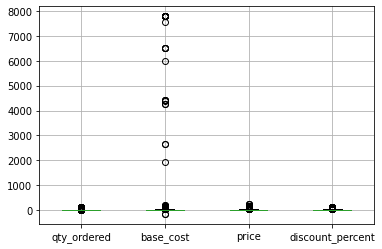

In [ ]:
data.boxplot(column=['qty_ordered','base_cost', 'price', 'discount_percent'])

In [ ]:
data['base_cost'].describe()

count    1.016198e+06
mean     8.088024e+00
std      3.715062e+01
min     -1.647974e+02
25%      3.790000e+00
50%      6.277400e+00
75%      1.016587e+01
max      7.790000e+03
Name: base_cost, dtype: float64

In [ ]:
q1 = data['base_cost'].quantile(0.25)
q3 = data['base_cost'].quantile(0.75)
IQR = q3- q1
print("Rango Intercuartil", IQR)

BI = (q1 - 1.5 * IQR)
BS = (q3 + 1.5 * IQR)
print("Bigote inferior", BI)
print("Bigote superior", BS)

Rango Intercuartil 6.375875
Bigote inferior -5.773812499999999
Bigote superior 19.729687499999997


In [ ]:
outliers_info = (data['base_cost'] < BI) | (data['base_cost'] >BS)
print("\n Ubicacion outliers\n", outliers_info)


 Ubicacion outliers
 0          False
1          False
2          False
3          False
4          False
           ...  
1016933    False
1016934    False
1016935    False
1016936    False
1016937    False
Name: base_cost, Length: 1016938, dtype: bool


In [ ]:
outliers = data[outliers_info]
print("\n Lista de outliers\n", outliers)


 Lista de outliers
                sku                 cat1                 cat2  \
106         000133             Infantil     Higiene infantil   
396         000300             Infantil     Higiene infantil   
419         000313             Infantil            Lactancia   
420         000313             Infantil            Lactancia   
421         000313             Infantil            Lactancia   
...            ...                  ...                  ...   
1014205    V680503  Cosmética y Belleza                 Ojos   
1014206    V681001  Cosmética y Belleza               Facial   
1014207    V681001  Cosmética y Belleza               Facial   
1014208    V681201  Cosmética y Belleza               Facial   
1014348  WJW167100            Nutrición  Nutrición Deportiva   

                             cat3  product_id  \
106       Canastillas y kits bebé        5887   
396       Canastillas y kits bebé        5522   
419      Accesorios de extracción        5206   
420      Acces

In [ ]:
outliers_order = outliers.sort_values('base_cost')
outliers_order

,sku,cat1,cat2,cat3,product_id,name,marca_value,short_description,analytic_category,picture,num_order,item_id,created_at,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode
642881,206656,Salud,Vitaminas y Minerales,Multivitamínicos,3388,Supradyn Activo Vitaminas y Energía 30 Comprim...,Supradyn,<p>Complemento alimenticio rico en vitaminas y...,Nutrición,https://www.mifarma.es/media/catalog/product/2...,bc62e2e0ff885fcd3264ed8d2d7df202,bd4dbeb1ddca5efd77dff02c557e991f,2018-12-30 19:40:30,2.0,-164.7974,13.46,10.0,aa1bc08de492ef8e8e8c605edfb6e191,basd,41630
642764,206656,Salud,Vitaminas y Minerales,Multivitamínicos,3388,Supradyn Activo 30 Comprimidos Efervescentes,Supradyn,<p>Complemento alimenticio rico en vitaminas y...,Nutrición,https://www.mifarma.es/media/catalog/product/2...,bc62e2e0ff885fcd3264ed8d2d7df202,bd4dbeb1ddca5efd77dff02c557e991f,2018-12-30 19:40:30,2.0,-164.7974,13.46,10.0,aa1bc08de492ef8e8e8c605edfb6e191,basd,41630
42772,0A32069,Cosmética y Belleza,Ojos,Contorno de Ojos,55910,Nuxe Nuxellence Contorno de Ojos Antiedad 15ml,Nuxe,<p>Nuevo contorno de ojos perteneciente a la g...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/0...,2ad0570edbc12ccee6057bf62765f8fe,e702ea05db34625a2510236fd629be35,2017-04-17 11:59:34,1.0,19.7300,28.88,5.0,ae07c374ae54521f218207e6de1eb8fe,Barcelona,08041
42773,0A32069,Cosmética y Belleza,Ojos,Contorno de Ojos,55910,Nuxe Nuxellence Contorno de Ojos Antiedad 15ml,Nuxe,<p>Nuevo contorno de ojos perteneciente a la g...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/0...,0232aa77ec92e6c6503085a935eb10b3,91e2b3ea7ffe5d6d0c45fc909974f08a,2017-04-23 21:40:34,1.0,19.7300,28.89,8.0,d00cceb10ae0b472a7027f5acc679538,Palos de la Frontera,21810
42774,0A32069,Cosmética y Belleza,Ojos,Contorno de Ojos,55910,Nuxe Nuxellence Contorno de Ojos Antiedad 15ml,Nuxe,<p>Nuevo contorno de ojos perteneciente a la g...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/0...,5a7c5e3ccd0e649a067666551a862663,a6af0ce29ff4c30ba9e233e4f68c27fc,2017-04-25 20:38:21,1.0,19.7300,28.89,10.0,46173ff4a5dec3fb76f4066aba8ce0e4,Valladolid,47002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855267,375881,Cosmética y Belleza,Facial,Acné,717,Avene Solar (SPF50) emulsao livre de óleo 50ml,Avene,<p>Protección solar SPF50+ oil free. Indicada ...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/3...,1a95c469f8be7116e9d8c221d9cf07cd,e99dbdbec66009281315014e7b3f9a39,2017-06-30 19:57:38,1.0,7790.0000,11.53,5.0,5ffbca1646e3d279d011580fba452747,Madrid,28022
855268,375881,Cosmética y Belleza,Facial,Acné,717,Avene Solar (SPF50) emulsao livre de óleo 50ml,Avene,<p>Protección solar SPF50+ oil free. Indicada ...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/3...,89fa3240f81672123c3f16611ef079f8,e152bc60ee7d8d807b631c761740c7f0,2017-07-03 09:30:25,1.0,7790.0000,11.53,5.0,d7e3a93691a4fd52f57d2413202472e3,argentona,08310
855270,375881,Cosmética y Belleza,Facial,Acné,717,Avene Solar (SPF50) emulsao livre de óleo 50ml,Avene,<p>Protección solar SPF50+ oil free. Indicada ...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/3...,547e82a6d9f682436651cee2a61baab4,2296bddb1f00ed6197756e437886c915,2017-07-03 22:10:53,1.0,7790.0000,11.53,5.0,dfc815469e9a428e489a065dc841e0fd,EL PUERTO DE STA MARIA,11500
855109,375881,Cosmética y Belleza,Facial,Acné,717,Avene Solar (SPF50+) Emulsión Oil-free 50ml,Avene,<p>Protección solar SPF50+ oil free. Indicada ...,Cosmética y Belleza,https://www.mifarma.es/media/catalog/product/3...,69d9f219730152e23848dbc6842bc9b2,5af13f46822025a13f4a65715774ea99,2017-07-03 15:09:30,1.0,7790.0000,11.53,5.0,dfc815469e9a428e489a065dc841e0fd,EL PUERTO DE STA MARIA,11500


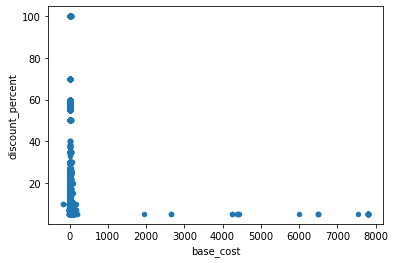

In [ ]:
data.plot(kind='scatter', x = 'base_cost', y='discount_percent')

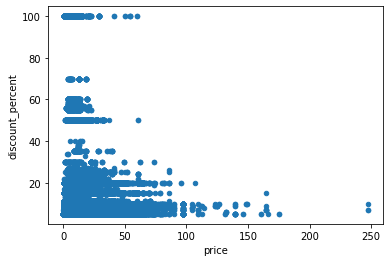

In [ ]:
data.plot(kind='scatter', x = 'price', y='discount_percent')

## Conversiones de Datos

In [ ]:
df_data = data.copy()
df_data['cat1'] = df_data['cat1'].replace(np.nan, "SN")
df_data['cat2'] = df_data['cat2'].replace(np.nan, "SN")
df_data['cat3'] = df_data['cat3'].replace(np.nan, "SN")

In [ ]:
df_data['cat1'] = df_data['cat1'].str.title()
df_data['cat2'] = df_data['cat2'].str.title()
df_data['cat3'] = df_data['cat3'].str.title()
df_data['year'] = pd.DatetimeIndex(df_data['created_at']).year
df_data['month'] = pd.DatetimeIndex(df_data['created_at']).month

## Evaluación tipos de datos

In [ ]:
import seaborn as sns

In [ ]:
df_data["qty_ordered"].describe().astype(int)

count    1016938
mean           1
std            1
min            1
25%            1
50%            1
75%            1
max          100
Name: qty_ordered, dtype: int64

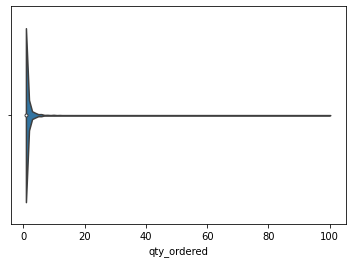

In [ ]:
ax = sns.violinplot(x=df_data["qty_ordered"])

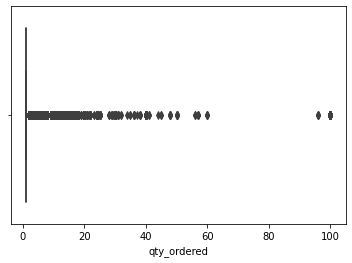

In [ ]:
ax = sns.boxplot(x=df_data["qty_ordered"])

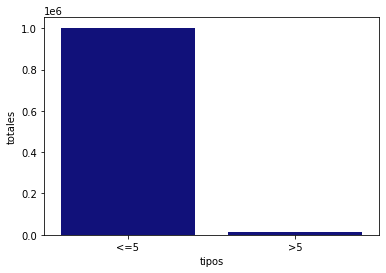

In [ ]:
total_qyt = len(df_data["qty_ordered"])
contar_qyt_uno =  len(df_data[df_data["qty_ordered"]<=5])
contar_qyt_otros = len(df_data[df_data["qty_ordered"]>5])
d = {'tipos': ["<=5", ">5"], 'totales': [contar_qyt_uno, contar_qyt_otros]}
df_qyt = pd.DataFrame(data=d)
bar1 = sns.barplot(x="tipos",  y="totales", data=df_qyt, color='darkblue')

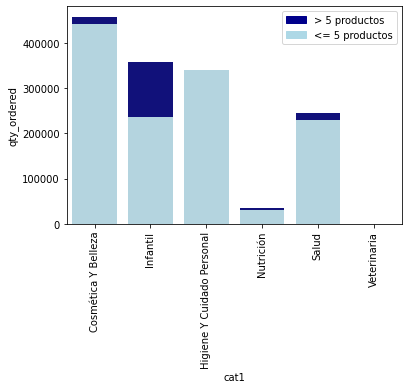

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

total = df_data.groupby('cat1')['qty_ordered'].sum().reset_index()
bar1 = sns.barplot(x="cat1",  y="qty_ordered", data=total, color='darkblue')
smoker = df_data[df_data["qty_ordered"]<=5]
bar2 = sns.barplot(x="cat1", y="qty_ordered", data=smoker, estimator=sum, ci=None,  color='lightblue')
top_bar = mpatches.Patch(color='darkblue', label='> 5 productos')
bottom_bar = mpatches.Patch(color='lightblue', label='<= 5 productos')
bar1.tick_params(axis='x', rotation=90)
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

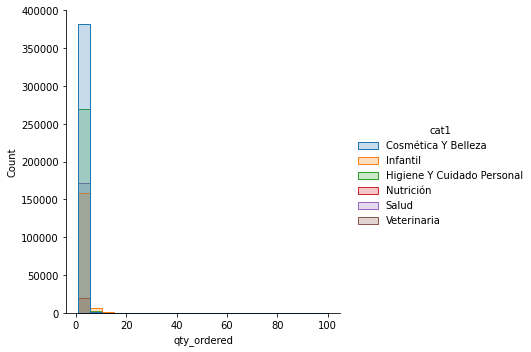

In [ ]:
sns.displot(df_data, x="qty_ordered", hue="cat1", element="step")

## Evaluación precios

In [ ]:
df_data["price"].describe().astype(int)

count    1016938
mean          10
std            8
min            0
25%            4
50%            8
75%           13
max          247
Name: price, dtype: int64

## Procesamiento de Datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016938 entries, 0 to 1016937
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1016938 non-null  object 
 1   cat1               1016938 non-null  object 
 2   cat2               1016822 non-null  object 
 3   cat3               1002007 non-null  object 
 4   product_id         1016938 non-null  int64  
 5   name               1012684 non-null  object 
 6   marca_value        1016938 non-null  object 
 7   short_description  1016861 non-null  object 
 8   analytic_category  964172 non-null   object 
 9   picture            1016938 non-null  object 
 10  num_order          1016938 non-null  object 
 11  item_id            1016938 non-null  object 
 12  created_at         1016938 non-null  object 
 13  qty_ordered        1016938 non-null  float64
 14  base_cost          1016198 non-null  float64
 15  price              1016938 non-n

## Identificación de Categorias Productos

In [ ]:
df_data['cat1'].value_counts()

Cosmética Y Belleza           383054
Higiene Y Cuidado Personal    272280
Salud                         173454
Infantil                      167339
Nutrición                      20695
Veterinaria                      116
Name: cat1, dtype: int64

In [ ]:
df_data['cat2'].value_counts()

Facial                                      233582
Corporal                                     89822
Dental                                       77351
Higiene Infantil                             67531
Sol                                          64976
Cabello                                      63053
Cambio De Pañal                              51525
Vitaminas Y Minerales                        35670
Botiquín                                     31963
Íntima                                       28966
Ojos                                         27149
Labial                                       23090
Óptica                                       18625
Nariz Y Oído                                 16165
Lactancia                                    13380
Salud Sexual                                 12987
Accesorios De Alimentación                   11968
Pérdida De Peso                              11565
Trastornos Digestivos                        11439
Problemas Cardiovasculares Y Ci

In [ ]:
df_data['cat3'].value_counts()

Antiarrugas                      57521
Pañales                          51497
Hidratantes                      50845
Protectores Solares              41926
Desmaquillantes Y Limpiadores    38904
                                 ...  
Peluches                             2
Kit Dental                           2
Gel Desinfectante                    2
Para La Cuna                         1
Botiquines Y Kits                    1
Name: cat3, Length: 249, dtype: int64

## Data Generator

In [ ]:
def generar_evolucion_por_mes(data,lista_excluir=["Veterinaria"]):
  df_cat1_by_month = data.groupby(["year", "month","cat1"])["cat1"].agg(["count"]).reset_index()
  value_list = lista_excluir
  selected = ~df_cat1_by_month["cat1"].isin(value_list)
  df_cat1_by_month_filt = df_cat1_by_month[selected]
  df_cat1_by_month_filt
  df_cat1_date = df_cat1_by_month_filt.pivot_table('count',['cat1'], ['year','month'])
  df_cat1_date.columns = [f'{i}-{j}' if j != '' else f'{i}' for i,j in df_cat1_date.columns]
  df_cat1_date = df_cat1_date.reset_index()
  return df_cat1_date

In [ ]:
df_evolucion_mes = generar_evolucion_por_mes(df_data)
df_evolucion_mes

,cat1,2017-1,2017-2,2017-3,2017-4,2017-5,2017-6,2017-7,2017-8,2017-9,...,2018-3,2018-4,2018-5,2018-6,2018-7,2018-8,2018-9,2018-10,2018-11,2018-12
0,Cosmética Y Belleza,6984,10092,11038,11402,2049,16005,17580,9494,10323,...,21193,22560,19722,4948,28325,21134,26564,18722,36294,32034
1,Higiene Y Cuidado Personal,5047,6654,6544,5959,1188,7538,10067,4851,8458,...,15488,15306,12709,2527,17239,15587,23780,16723,26594,28591
2,Infantil,4242,4786,4813,4233,2406,4473,7067,3974,5340,...,10007,9504,8569,6032,9544,7508,10380,6129,12057,14801
3,Nutrición,517,641,665,602,112,668,915,356,871,...,1152,1201,1000,221,1068,948,1577,1179,1990,1877
4,Salud,3512,4940,4876,3904,836,4697,6629,2664,4937,...,9624,9689,7814,1786,11214,9912,14819,12409,17929,17911


In [ ]:
df_evolucion_mes.to_csv("df_evolucion_mes.csv",index=False)

In [ ]:
def generar_totales_catalogos(data):
  df_categorias_qty = data.groupby(["cat1", "cat2","cat3"])["qty_ordered"].agg(["sum"]).reset_index()
  df_categorias_qty.insert(0, "main", "Atmira") 
  return df_categorias_qty

In [ ]:
df_categorias_qty = generar_totales_catalogos(df_data)
df_data[df_data["cat1"]=="Veterinaria"]

,sku,cat1,cat2,cat3,product_id,name,marca_value,short_description,analytic_category,picture,...,created_at,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode,year,month
1217,001469,Veterinaria,Sn,Sn,63841,Hyaloral Perros Pequeños y Medianos -20 Kg 90 ...,Pharmadiet,<p>Hyaloral es un suplemento alimenticio para ...,NaN,https://www.mifarma.es/media/catalog/product/0...,...,2017-06-21 13:23:37,1.0,25.751,25.45,5.0,9a7ced7343318f7ac315a4e48fd27250,Esparreguera,08292,2017,6
1218,001469,Veterinaria,Sn,Sn,63841,Hyaloral Perros Pequeños y Medianos -20 Kg 90 ...,Pharmadiet,<p>Hyaloral es un suplemento alimenticio para ...,NaN,https://www.mifarma.es/media/catalog/product/0...,...,2018-05-28 17:14:57,1.0,22.660,25.46,5.0,9f49a6665fcab5517afb0c6428e44047,L'Alcudia,46250,2018,5
1219,001469,Veterinaria,Sn,Sn,63841,Hyaloral Perros Pequeños y Medianos -20 Kg 90 ...,Pharmadiet,<p>Hyaloral es un suplemento alimenticio para ...,NaN,https://www.mifarma.es/media/catalog/product/0...,...,2018-05-28 17:14:57,1.0,22.660,25.46,5.0,9f49a6665fcab5517afb0c6428e44047,L'Alcudia,46250,2018,5
64120,113159=575349,Veterinaria,Sn,Sn,5203,Scalibor Collar para Perros Pequeño 48 cm,Mercks,<p>Collar antiparasitario\n</p>,Veterinaria,https://www.mifarma.es/media/catalog/product/1...,...,2017-03-10 01:38:31,2.0,14.510,20.37,5.0,22e0dd2c9302c7c051de42e727223591,Malaga,29590,2017,3
64121,113159=575349,Veterinaria,Sn,Sn,5203,Scalibor Collar para Perros Pequeño 48 cm,Mercks,<p>Collar antiparasitario\n</p>,Veterinaria,https://www.mifarma.es/media/catalog/product/1...,...,2017-04-19 22:20:49,1.0,14.510,20.36,8.0,56d2a03c3c981d5bd0971688ca745682,Dos Hermanas,41089,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984282,MF10023,Veterinaria,Sn,Sn,63445,Parasital Collar Repelente Perros Medianos y P...,Zotal,<p>Collar repelente para <strong>perros pequeñ...,Veterinaria,https://www.mifarma.es/media/catalog/product/m...,...,2018-08-30 15:05:03,1.0,3.850,4.81,15.0,b137cceb97e13b56250c6adb0c049f54,puertollano,13500,2018,8
984283,MF10023,Veterinaria,Sn,Sn,63445,Parasital Collar Repelente Perros Medianos y P...,Zotal,<p>Collar repelente para <strong>perros pequeñ...,Veterinaria,https://www.mifarma.es/media/catalog/product/m...,...,2018-09-26 08:16:43,2.0,3.850,4.81,5.0,bf41fe64e56767317987c5cc085d542b,IBI,03440,2018,9
984284,MF10023,Veterinaria,Sn,Sn,63445,Parasital Collar Repelente Perros Medianos y P...,Zotal,<p>Collar repelente para <strong>perros pequeñ...,Veterinaria,https://www.mifarma.es/media/catalog/product/m...,...,2018-09-26 08:27:51,2.0,3.850,4.81,5.0,bf41fe64e56767317987c5cc085d542b,IBI,03440,2018,9
984285,MF10023,Veterinaria,Sn,Sn,63445,Parasital Collar Repelente Perros Medianos y P...,Zotal,<p>Collar repelente para <strong>perros pequeñ...,Veterinaria,https://www.mifarma.es/media/catalog/product/m...,...,2018-09-26 08:30:05,2.0,3.850,4.81,5.0,bf41fe64e56767317987c5cc085d542b,IBI,03440,2018,9


In [ ]:
df_categorias_qty.to_csv("df_categorias_qty.csv",index=False)

In [ ]:
def generar_estaditicas_top_productos(df_data):
  df_prod_price = df_data.groupby(["cat3"]).agg(count_qty=('qty_ordered', 'sum'), max_price=('price', 'max'),min_price=('price', 'min'),mean_price=('price', 'mean'),median_price=('price', 'median')).reset_index()
  df_prod_price_sort = df_prod_price.sort_values(by=['count_qty'],ascending=False).head(10)
  df_melt_prod = pd.melt(df_prod_price_sort, id_vars=['cat3','count_qty'], value_vars=['max_price','min_price','mean_price','median_price'])
  return df_melt_prod


In [ ]:
df_estaditicas_top_productos = generar_estaditicas_top_productos(df_data)
df_estaditicas_top_productos

,cat3,count_qty,variable,value
0,Pañales,147739.0,max_price,24.430000
1,Antiarrugas,73542.0,max_price,95.950000
2,Hidratantes,59068.0,max_price,78.890000
3,Protectores Solares,49948.0,max_price,27.450000
4,Desmaquillantes Y Limpiadores,45544.0,max_price,45.460000
5,Hidratación,40550.0,max_price,35.510000
6,Acné,40451.0,max_price,41.240000
7,Limpieza,36563.0,max_price,25.410000
8,Dentífricos,32029.0,max_price,30.540000
9,Colutorios,27132.0,max_price,27.000000


In [ ]:
df_estaditicas_top_productos.to_csv("df_estaditicas_top_productos.csv",index=False)